In [2]:
from __future__ import absolute_import
from __future__ import print_function
from __future__ import division

import os
import errno

import numpy as np

from tensorflow.python.keras import backend as K
from tensorflow.python.keras.optimizers import Adam

from deepcell import make_training_data
from deepcell.model_zoo import bn_feature_net_3D, bn_multires_feature_net
from deepcell.model_zoo import disc_net_3D
from deepcell.training import train_model_movie, train_model_disc_3D, train_model_conv
from deepcell.utils.data_utils import get_data
from deepcell.utils.train_utils import rate_scheduler

In [3]:
# data options
DATA_OUTPUT_MODE = 'conv'
PADDING = 'same'
BORDER_MODE = 'valid' if DATA_OUTPUT_MODE == 'sample' else 'same'
RESIZE = True
RESHAPE_SIZE = 256
NUM_FRAMES = 15 # get first N frames from each training folder

# filepath constants
DATA_DIR = '/data/data'
MODEL_DIR = '/data/models'
NPZ_DIR = '/data/npz_data'
RESULTS_DIR = '/data/results'
EXPORT_DIR = '/data/exports'
PREFIX = 'cells/MouseBrain/generic'
DATA_FILE = 'MouseBrain_{}_{}'.format(K.image_data_format(), DATA_OUTPUT_MODE)

for d in (NPZ_DIR, MODEL_DIR, RESULTS_DIR):
    try:
        os.makedirs(os.path.join(d, PREFIX))
    except OSError as exc:  # Guard against race condition
        if exc.errno != errno.EEXIST:
            raise

In [23]:
# Generate training data
file_name_save = os.path.join(NPZ_DIR, PREFIX, DATA_FILE)
num_of_features = 2  # Specify the number of feature masks that are present
window_size = (30, 30, 30)  # Size of window around pixel

# Create the training data
make_training_data(
    direc_name=os.path.join(DATA_DIR, PREFIX),
    dimensionality=3,
    window_size_x=window_size[0],
    window_size_y=window_size[1],
    window_size_z=window_size[2],
    padding=PADDING,
    file_name_save=file_name_save,
    training_direcs=None,
    channel_names=[''],
    num_frames=NUM_FRAMES,
    num_of_frames_to_display=5,
    num_of_features=num_of_features,
    montage_mode=True,
    raw_image_direc='stacked_raw_parts',
    annotation_direc='annotated/all_montages',
    annotation_name='',  # basically channel name but for annotated images
    reshape_size=RESHAPE_SIZE if RESIZE else None,
    edge_feature=[1, 0, 0], # Specify which feature is the edge feature,
    dilation_radius=1,
    output_mode=DATA_OUTPUT_MODE,
    display=False,
    process=True,
    process_std=True,
    verbose=True)

Loading  channel data from training dir 1: /data/data/cells/MouseBrain/generic/set0/stacked_raw_parts/set_0_12_x_0_y_0
Loading  channel data from training dir 2: /data/data/cells/MouseBrain/generic/set0/stacked_raw_parts/set_0_12_x_0_y_1
Loading  channel data from training dir 3: /data/data/cells/MouseBrain/generic/set0/stacked_raw_parts/set_0_12_x_0_y_2
Loading  channel data from training dir 4: /data/data/cells/MouseBrain/generic/set0/stacked_raw_parts/set_0_12_x_0_y_3
Loading  channel data from training dir 5: /data/data/cells/MouseBrain/generic/set0/stacked_raw_parts/set_0_12_x_1_y_0
Loading  channel data from training dir 6: /data/data/cells/MouseBrain/generic/set0/stacked_raw_parts/set_0_12_x_1_y_1
Loading  channel data from training dir 7: /data/data/cells/MouseBrain/generic/set0/stacked_raw_parts/set_0_12_x_1_y_2
Loading  channel data from training dir 8: /data/data/cells/MouseBrain/generic/set0/stacked_raw_parts/set_0_12_x_1_y_3
Loading  channel data from training dir 9: /data

Loading  channel data from training dir 77: /data/data/cells/MouseBrain/generic/set2/stacked_raw_parts/set_2_12_x_3_y_2
Loading  channel data from training dir 78: /data/data/cells/MouseBrain/generic/set2/stacked_raw_parts/set_2_12_x_3_y_3
Loading  channel data from training dir 79: /data/data/cells/MouseBrain/generic/set2/stacked_raw_parts/set_2_22_x_0_y_0
Loading  channel data from training dir 80: /data/data/cells/MouseBrain/generic/set2/stacked_raw_parts/set_2_22_x_0_y_1
Loading  channel data from training dir 81: /data/data/cells/MouseBrain/generic/set2/stacked_raw_parts/set_2_22_x_0_y_2
Loading  channel data from training dir 82: /data/data/cells/MouseBrain/generic/set2/stacked_raw_parts/set_2_22_x_0_y_3
Loading  channel data from training dir 83: /data/data/cells/MouseBrain/generic/set2/stacked_raw_parts/set_2_22_x_1_y_0
Loading  channel data from training dir 84: /data/data/cells/MouseBrain/generic/set2/stacked_raw_parts/set_2_22_x_1_y_1
Loading  channel data from training dir 

Loading  channel data from training dir 153: /data/data/cells/MouseBrain/generic/set4/stacked_raw_parts/set_4_22_x_3_y_0
Loading  channel data from training dir 154: /data/data/cells/MouseBrain/generic/set4/stacked_raw_parts/set_4_22_x_3_y_1
Loading  channel data from training dir 155: /data/data/cells/MouseBrain/generic/set4/stacked_raw_parts/set_4_22_x_3_y_2
Loading  channel data from training dir 156: /data/data/cells/MouseBrain/generic/set4/stacked_raw_parts/set_4_22_x_3_y_3
Loading  channel data from training dir 157: /data/data/cells/MouseBrain/generic/set5/stacked_raw_parts/set_5_12_x_0_y_0
Loading  channel data from training dir 158: /data/data/cells/MouseBrain/generic/set5/stacked_raw_parts/set_5_12_x_0_y_1
Loading  channel data from training dir 159: /data/data/cells/MouseBrain/generic/set5/stacked_raw_parts/set_5_12_x_0_y_2
Loading  channel data from training dir 160: /data/data/cells/MouseBrain/generic/set5/stacked_raw_parts/set_5_12_x_0_y_3
Loading  channel data from train

Reshaped feature data from (220, 15, 256, 256, 1) to (220, 15, 256, 256, 1)
Reshaped training data from (220, 15, 256, 256, 1) to (220, 15, 256, 256, 1)


In [4]:
# Foreground/background model
direc_save = os.path.join(MODEL_DIR, PREFIX)
direc_data = os.path.join(NPZ_DIR, PREFIX)
training_data = np.load(os.path.join(direc_data, DATA_FILE + '.npz'))

X, y = training_data['X'], training_data['y']

n_epoch = 5
batch_size = 1
optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
lr_sched = rate_scheduler(lr=1e-5, decay=0.99)
frames_per_batch = 10

is_channels_first = K.image_data_format() == 'channels_first'
row_axis = 3 if is_channels_first else 2
col_axis = 4 if is_channels_first else 3
channel_axis = 1 if is_channels_first else 4

size = (RESHAPE_SIZE, RESHAPE_SIZE) if RESIZE else X.shape[row_axis:col_axis + 1]
if is_channels_first:
    batch_shape = (batch_size, X.shape[channel_axis], frames_per_batch, size[0], size[1])
else:
    batch_shape = (batch_size, frames_per_batch, size[0], size[1], X.shape[channel_axis])

fgbg_model = bn_feature_net_3D(
    batch_shape=batch_shape,
    n_features=2,
    location=False,
    norm_method='whole_image')

train_model_movie(
    model=fgbg_model,
    dataset=DATA_FILE,
    optimizer=optimizer,
    batch_size=batch_size,
    number_of_frames=frames_per_batch,
    n_epoch=n_epoch,
    direc_save=direc_save,
    direc_data=direc_data,
    lr_sched=lr_sched,
    expt='fgbg',
    rotation_range=180,
    flip=True,
    shear=False)

X_train shape: (198, 15, 256, 256, 1)
y_train shape: (198, 15, 256, 256, 1)
X_test shape: (22, 15, 256, 256, 1)
y_test shape: (22, 15, 256, 256, 1)
Output Shape: (1, 10, 256, 256, 2)
Number of Classes: 2
Using real-time data augmentation.
Epoch 1/5
296/297 [============================>.] - ETA: 1s - loss: 0.2931 - acc: 0.8844
Epoch 00001: val_loss improved from inf to 0.25023, saving model to /data/models/cells/MouseBrain/generic/2018-08-22_MouseBrain_channels_last_conv_fgbg_0.h5
297/297 [==============================] - 447s 2s/step - loss: 0.2929 - acc: 0.8846 - val_loss: 0.2502 - val_acc: 0.9234
Epoch 2/5
296/297 [============================>.] - ETA: 1s - loss: 0.2103 - acc: 0.9121
Epoch 00002: val_loss improved from 0.25023 to 0.21507, saving model to /data/models/cells/MouseBrain/generic/2018-08-22_MouseBrain_channels_last_conv_fgbg_0.h5
297/297 [==============================] - 438s 1s/step - loss: 0.2101 - acc: 0.9121 - val_loss: 0.2151 - val_acc: 0.9317
Epoch 3/5
296/297 [

In [5]:
# Disc model
direc_save = os.path.join(MODEL_DIR, PREFIX)
direc_data = os.path.join(NPZ_DIR, PREFIX)
training_data = np.load(os.path.join(direc_data, DATA_FILE + '.npz'))

X, y = training_data['X'], training_data['y']

n_epoch = 10
batch_size = 32 if DATA_OUTPUT_MODE == 'sample' else 1
optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
lr_sched = rate_scheduler(lr=5e-5, decay=0.99)
frames_per_batch = 10

is_channels_first = K.image_data_format() == 'channels_first'
row_axis = 3 if is_channels_first else 2
col_axis = 4 if is_channels_first else 3
channel_axis = 1 if is_channels_first else 4

size = (RESHAPE_SIZE, RESHAPE_SIZE) if RESIZE else X.shape[row_axis:col_axis + 1]
if is_channels_first:
    batch_shape = (batch_size, X.shape[channel_axis], frames_per_batch, size[0], size[1])
else:
    batch_shape = (batch_size, frames_per_batch, size[0], size[1], X.shape[channel_axis])

disc_model = disc_net_3D(
    batch_shape=batch_shape,
    norm_method='std',
    n_features=3, # Embedding dimensions
    location=True,
    seg_model=fgbg_model,
    softmax=False)

train_model_disc_3D(
    model=disc_model,
    dataset=DATA_FILE,
    optimizer=optimizer,
    batch_size=batch_size,
    n_epoch=n_epoch,
    direc_save=direc_save,
    direc_data=direc_data,
    lr_sched=lr_sched,
    number_of_frames=frames_per_batch,
    rotation_range=180,
    flip=True,
    shear=False,
    zoom_range=0) # a float or a tuple or list of two floats

X_train shape: (198, 15, 256, 256, 1)
y_train shape: (198, 15, 256, 256, 1)
X_test shape: (22, 15, 256, 256, 1)
y_test shape: (22, 15, 256, 256, 1)
Output Shape: (1, 10, 256, 256, 3)
Number of Classes: 3
Epoch 1/10
296/297 [============================>.] - ETA: 3s - loss: 6.0714
Epoch 00001: val_loss improved from inf to 4.46318, saving model to /data/models/cells/MouseBrain/generic/2018-08-22_MouseBrain_channels_last_conv__0.h5
297/297 [==============================] - 1158s 4s/step - loss: 6.0733 - val_loss: 4.4632
Epoch 2/10
296/297 [============================>.] - ETA: 3s - loss: 5.8913
Epoch 00002: val_loss improved from 4.46318 to 4.33324, saving model to /data/models/cells/MouseBrain/generic/2018-08-22_MouseBrain_channels_last_conv__0.h5
297/297 [==============================] - 1148s 4s/step - loss: 5.8937 - val_loss: 4.3332
Epoch 3/10
296/297 [============================>.] - ETA: 3s - loss: 5.8556
Epoch 00003: val_loss did not improve
297/297 [==========================

In [6]:
training_data_file_name = os.path.join(direc_data, DATA_FILE + '.npz')
train_dict, (X_test, y_test) = get_data(training_data_file_name, mode='conv', seed=21)

test_images = disc_model.predict(X_test[:1,:10,:,:,:])
test_images_fgbg = fgbg_model.predict(X_test[:1,:10,:,:,:])

print(test_images.shape)
print(test_images_fgbg.shape)

(1, 10, 256, 256, 3)
(1, 10, 256, 256, 2)


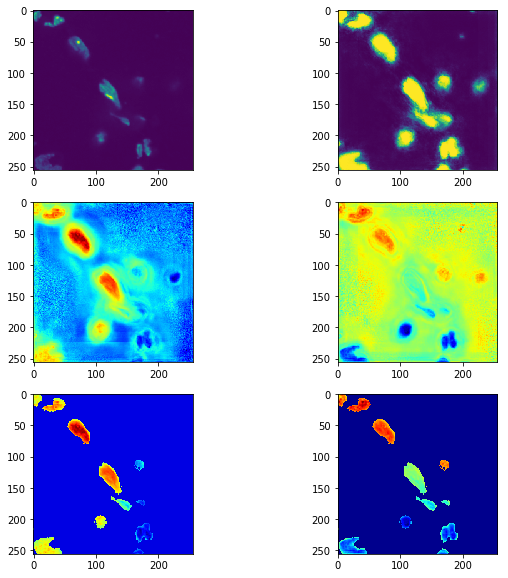

In [7]:
import matplotlib.pyplot as plt

channel_axis = 1 if K.image_data_format() == 'channels_first' else -1

plt.rcParams['figure.figsize'] = [10, 10]

fg_thresh = test_images_fgbg[:, :, :, :, 1] > 0.9
fg_thresh = np.expand_dims(fg_thresh, axis=channel_axis)
test_images_post_fgbg=test_images[:, :, :, :, :] * fg_thresh

index = 2

plt.subplot(3, 2, 1)
plt.imshow(X_test[0, index, :, :, 0])

plt.subplot(3, 2, 2)
plt.imshow(test_images_fgbg[0, index, :, :, 1])

plt.subplot(3, 2, 3)
plt.imshow(test_images[0, index, :, :, 0], cmap='jet')

plt.subplot(3, 2, 4)
plt.imshow(test_images[0, index, :, :, 1], cmap='jet')

plt.subplot(3, 2, 5)
plt.imshow(test_images_post_fgbg[0, index, :, :, 0], cmap='jet')

plt.subplot(3, 2, 6)
plt.imshow(test_images_post_fgbg[0, index, :, :, 1], cmap='jet')

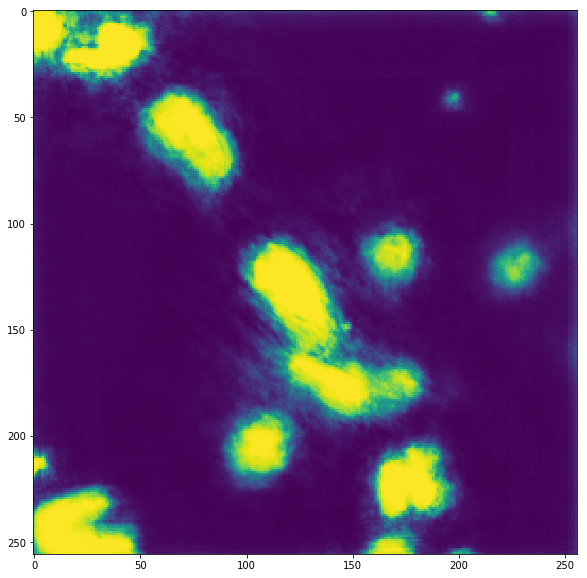

In [8]:
plt.rcParams['figure.figsize'] = [10, 10]

training_data_file_name = os.path.join(direc_data, DATA_FILE + '.npz')
train_dict, (X_test, y_test) = get_data(training_data_file_name, mode='conv', seed=21)
test_images_fgbg = fgbg_model.predict(X_test[:1,:10,:,:,:])

plt.imshow(test_images_fgbg[0, 0, :, :, 1])

In [112]:
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = [16, 8]

batch = 0

test_plot_mean_shift = np.zeros_like(test_images_fgbg[batch, :, :, :, 0].reshape(-1, 256, 256))

# Mean Shift
from sklearn.cluster import MeanShift, estimate_bandwidth

for index in range(test_images_post_fgbg.shape[1]):
    test_plot = test_images_post_fgbg[batch, index, :, :, :].reshape(-1, 3)
    bandwidth = estimate_bandwidth(test_plot, n_samples=2000)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(test_plot)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    test_plot_mean_shift[index, :, :] = labels.reshape(256, 256)

    print("MeanShift - number of estimated clusters : %d" % n_clusters_)

MeanShift - number of estimated clusters : 20
MeanShift - number of estimated clusters : 18
MeanShift - number of estimated clusters : 17
MeanShift - number of estimated clusters : 15
MeanShift - number of estimated clusters : 13
MeanShift - number of estimated clusters : 13
MeanShift - number of estimated clusters : 14
MeanShift - number of estimated clusters : 17
MeanShift - number of estimated clusters : 16
MeanShift - number of estimated clusters : 16


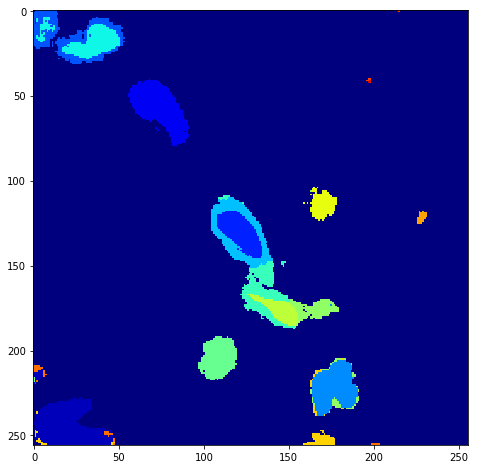

In [113]:
plt.imshow(test_plot_mean_shift[0, :, :], cmap='jet')

In [114]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

def get_js_video(images):
   fig = plt.figure()

   ims = []
   for i in range(images.shape[0]):
       im = plt.imshow(images[i, :, :], animated=True, cmap='jet')
       ims.append([im])

   ani = animation.ArtistAnimation(fig, ims, interval=150, repeat_delay=1000)
   return HTML(ani.to_jshtml())

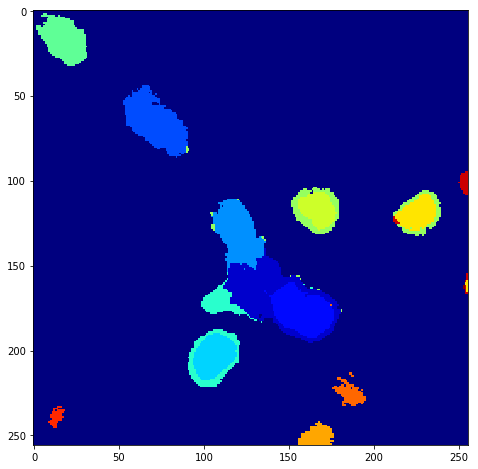

In [115]:
get_js_video(test_plot_mean_shift)

In [121]:
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics

batch = 0

test_plot_dbscan = np.zeros_like(test_images_fgbg[batch, :, :, :, 0].reshape(-1, 256, 256))

for index in range(test_images_post_fgbg.shape[1]):
    test_plot = test_images_post_fgbg[batch, index, :, :, :].reshape(-1, 3)

    db = DBSCAN(eps=0.15, min_samples=5, algorithm='kd_tree').fit(test_plot)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    test_plot_dbscan[index] = labels.reshape(256, 256)

    print('DBSCAN - Estimated number of clusters: %d' % n_clusters_)


DBSCAN - Estimated number of clusters: 13
DBSCAN - Estimated number of clusters: 12
DBSCAN - Estimated number of clusters: 13
DBSCAN - Estimated number of clusters: 14
DBSCAN - Estimated number of clusters: 13
DBSCAN - Estimated number of clusters: 11
DBSCAN - Estimated number of clusters: 13
DBSCAN - Estimated number of clusters: 12
DBSCAN - Estimated number of clusters: 13
DBSCAN - Estimated number of clusters: 13


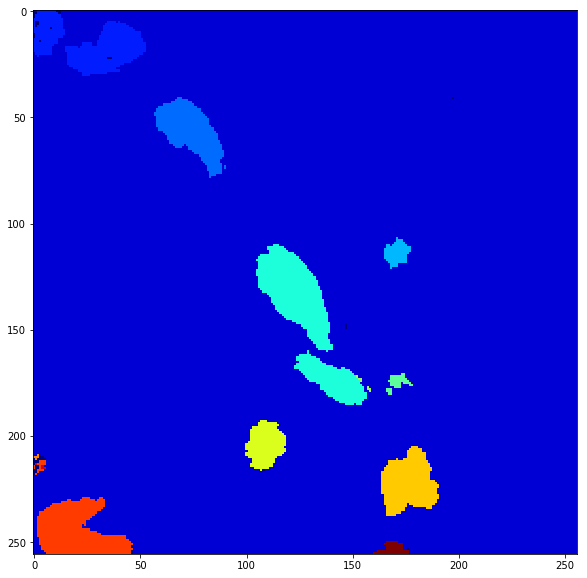

In [122]:
plt.imshow(test_plot_dbscan[0, :, :], cmap='jet')

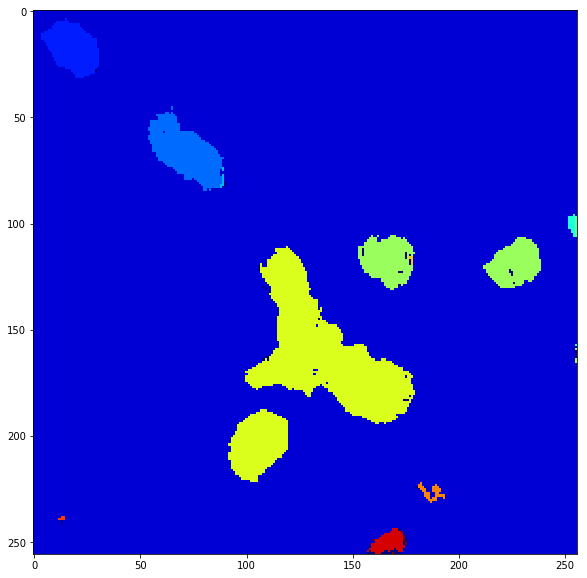

In [123]:
get_js_video(test_plot_dbscan)

In [ ]:
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics

batch = 0

test_plot = test_images_post_fgbg[batch, :, :, :, :].reshape(-1, 3)

db = DBSCAN(eps=0.15, min_samples=5, algorithm='kd_tree').fit(test_plot)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
test_plot_dbscan = labels.reshape(-1, 256, 256)

print('DBSCAN - Estimated number of clusters: %d' % n_clusters_)

In [ ]:
get_js_video(test_plot_dbscan)